# FDTD Geometry Writer Test
To test the FDTD geometry writer code I've supplied some testing data and this interactive notebook
in the io directory there are the following files required for this test to run properly
- TestShape.png
- pphinfoini.json
- params.json


### TestShape.png
the test shape is is a 100x100 pixel black square without rounded edges in the center of a 
500x500 pixel domain with an inset 50x50 pixel white square located at (250, 275). This shape
was chosen as a simple example that utilizes the case of placing multiple in line materials. 
The material list should contain 49 material entries with a width of 100 Pixels corresponding 
to each row of the image the remaining 50 rows of the image will be split into 2 material entries
with a width of 25 pixels each, there is one material entry that is 49 pixels long due to an artifact
in the image at the transition from the initial shape to the inset where the color is neither black 
nor white. This test image can thus be recreated with 150 entries to the geometry.json file

### pphinfoini.json
the pphinfoini.json is the input file for the fdtd simulation, it is included to warn the user if the
input image does not match the input file that the simulation is provided. From this file this program
retrieves the expected domain size, the center position, and the step size. The step size is used by the 
geometry writer to convert from pixel width to geometry width 

### params.json
the params.json includes all of the additional information needed to generate a geometry.json file including
the name of each material that will receive data in the geometry file, how thick each material is, and where
each material is placed. 

In [1]:
import sys, os, json
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join('..', 'docs/source')))
import fdtdgeometrywriter as writer

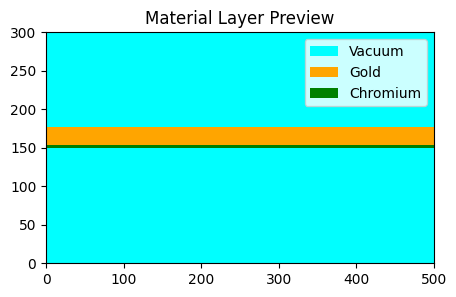

In [2]:
f = open("io/params.json")
params = json.load(f)
f.close()
MaterialLayer = params['MaterialLayer']
MaterialThickness = params['MaterialThickness']
MaterialLabel = params['MaterialLabel']
MaterialImagePath = params['MaterialImagePath']
MaterialImages = []
for i in range(len(MaterialLabel)):
    MaterialImages.append(writer.getImage(MaterialImagePath [i]))
MaterialLayer

f = open("io/pphinfoini.json")
params = json.load(f)
f.close()
DomainSize = params["Domain Size"]
StepSize = params["Step Size"][0]
CenterPosition = params["Center Position"]

ImageDomainSize = [MaterialImages[0].shape[0], DomainSize[1], MaterialImages[0].shape[1]]
if ImageDomainSize != DomainSize:
    print("Domain Size, Image Size Mismatch")
    
if int(DomainSize[0]/2) != CenterPosition[0] or int(DomainSize[1]/2) != CenterPosition[1] or int(DomainSize[2]/2) != CenterPosition[2]:
    print("Domain Size, Center Position Mismatch")
    
writer.MaterialLayerPreview(MaterialLayer, MaterialThickness, MaterialLabel, DomainSize)

In [4]:
writer.WriteGeometryFile(MaterialLayer, MaterialThickness, MaterialLabel, MaterialImages, StepSize, DomainSize)

150 Material Blocks Detected
150 Material Blocks Detected


150 Material Blocks Detected


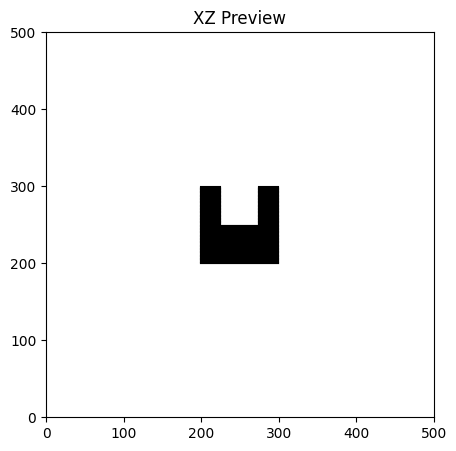

150 Material Blocks Detected


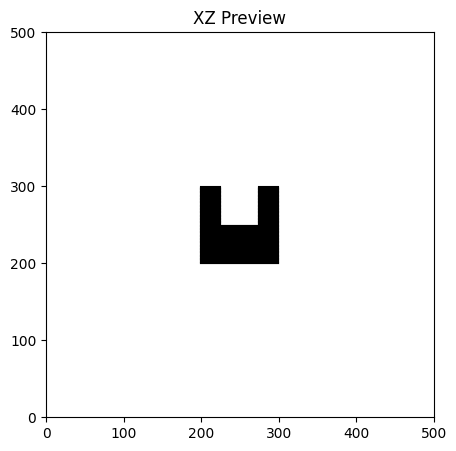

In [24]:
f = open("io/geometry.json", "w")
f.write('[')
f.close()
f = open("io/geometry.json", "a")
for i in range(len(MaterialLabel)):
    MaterialList = writer.getMaterialList(MaterialImages[i], MaterialLabel[i], MaterialThickness[i])
    writer.DisplayPreview(MaterialList, DomainSize)
    for k in range(len(MaterialList)-1):
        f.write(writer.GeometryEntryString(MaterialList[k], StepSize, MaterialLayer[i]))
        f.write(',')
    f.write(writer.GeometryEntryString(MaterialList[-1], StepSize, MaterialLayer[i]))
    if i != len(MaterialLabel)-1:
        f.write(',')
f.write(']')
f.close()    
        


## Verify Materials
There should be 49 Materials with a 100 Pixel Width each with an x-coordinate of 249, and 100 Material Entries with a 25 Pixel Width and an x-coordinate of either 287 or 212

In [84]:
count100_pixels = 0
count25_pixels = 0
for i in range(len(GoldList)):
    print(f"Material at {GoldList[i].Position} with a Width of {GoldList[i].Width} Pixels")
    if GoldList[i].Width == 100:
        count100_pixels += 1
    elif GoldList[i].Width == 25:
        count25_pixels += 1
print(f"{count100_pixels} Materials with a Pixel Width of 100")
print(f"{count25_pixels} Materials with a Pixel Width of 25")

Material at (249, 200) with a Width of 100 Pixels
Material at (249, 201) with a Width of 100 Pixels
Material at (249, 202) with a Width of 100 Pixels
Material at (249, 203) with a Width of 100 Pixels
Material at (249, 204) with a Width of 100 Pixels
Material at (249, 205) with a Width of 100 Pixels
Material at (249, 206) with a Width of 100 Pixels
Material at (249, 207) with a Width of 100 Pixels
Material at (249, 208) with a Width of 100 Pixels
Material at (249, 209) with a Width of 100 Pixels
Material at (249, 210) with a Width of 100 Pixels
Material at (249, 211) with a Width of 100 Pixels
Material at (249, 212) with a Width of 100 Pixels
Material at (249, 213) with a Width of 100 Pixels
Material at (249, 214) with a Width of 100 Pixels
Material at (249, 215) with a Width of 100 Pixels
Material at (249, 216) with a Width of 100 Pixels
Material at (249, 217) with a Width of 100 Pixels
Material at (249, 218) with a Width of 100 Pixels
Material at (249, 219) with a Width of 100 Pixels
